# Etapa 1

Verificando se as bibliotecas **Pandas** e **Matplotlib** estão instaladas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Etapa 2

Leitura do arquivo CSV para:
- Remoção de linhas duplicadas
- Criação do gráfico de barras contendo os top 5 apps por número de instalação
- Criação do gráfico de pizza mostrando as categorias de apps existentes de acordo com a frequência com que aparecem
- Mostrar qual o app mais caro
- Mostrar quantos apps são classificados como 'Mature 17+'
- Mostrar o top 10 apps por número de reviews
- Criar pelo menos mais 2 cálculos no dataset apresentando um em formato de lista e outro em formato de valor.
- Criar pelo menos outros 2 formas gráficas de exibição dos indicadores

In [47]:
# Leitura do arquivo
dados = pd.read_csv('googleplaystore.csv')

# Visualização rápida dos dados
print(dados.columns)
print(dados.index)
print(dados.describe())
dados.head()

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
RangeIndex(start=0, stop=10841, step=1)
            Rating       Reviews
count  9367.000000  1.084100e+04
mean      4.191513  4.441119e+05
std       0.515735  2.927629e+06
min       1.000000  0.000000e+00
25%       4.000000  3.800000e+01
50%       4.300000  2.094000e+03
75%       4.500000  5.476800e+04
max       5.000000  7.815831e+07


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Remoção das linhas duplicadas

In [139]:
dados = dados.drop_duplicates()

## Criação do gráfico de barras contendo os top 5 apps por número de instalação

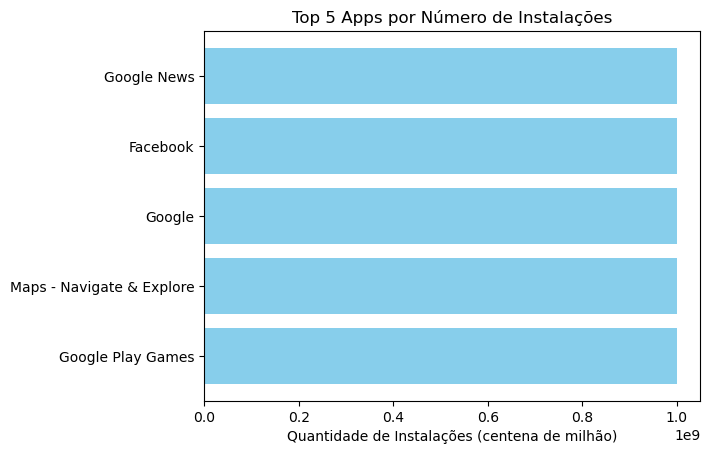

In [138]:
# Filtrando o dataset pelas colunas 'App' e 'Installs'
top_apps_installs = dados[['App', 'Installs']]

# Limpeza dos dados para melhor visualização
top_apps_installs = top_apps_installs.apply(lambda x: x.str.replace('+', ''))
top_apps_installs = top_apps_installs.apply(lambda x: x.str.replace(',', ''))
top_apps_installs['Installs'] = top_apps_installs['Installs'].astype(int)

# Ordenação dos dados e seleção dos 5 primeiros
top_apps_installs = top_apps_installs.sort_values(['Installs'], ascending=False)
top_apps_installs = top_apps_installs.head(6)

# Criação do gráfico de barras horizontais
plt.title('Top 5 Apps por Número de Instalações')
plt.barh(top_apps_installs['App'], top_apps_installs['Installs'], color='skyblue')
plt.xlabel('Quantidade de Instalações (centena de milhão)')
plt.show()

## Criação do gráfico de pizza mostrando as categorias de apps existentes de acordo com a frequência com que aparecem

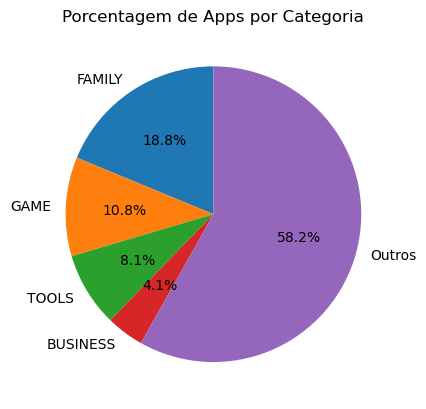

In [ ]:
# Crio uma serie com a frequência relativa de cada categoria no dataset
categorias = dados['Category'].value_counts(ascending=False, normalize=True)

# Defino as categorias principais e a porcentagem de outras categorias
top_categorias = categorias.head(4)
resto = categorias.iloc[4:]
outros_percent = resto.sum()

# Adiciono a porcentagem de outras categorias ao top_categorias
if outros_percent > 0:
    categorias_agrupadas = pd.concat([top_categorias, pd.Series([outros_percent], index=['Outros'])])
else:
    categorias_agrupadas = top_categorias

# Plotagem dos dados em um gráfico de pizza
plt.title('Porcentagem de Apps por Categoria')
plt.pie(
    categorias_agrupadas,
    labels=categorias_agrupadas.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.show()


# Mostrar qual o app mais caro

In [133]:
# Tratamento dos dados para a visualização
dados['Price'] = dados['Price'].apply(lambda x: x.replace('$', ''))
dados['Price'] = dados['Price'].astype(float)

# Cálculo do aplicativo mais caro do dataset
mais_caro = dados['Price'].sort_values(ascending=False).head(1)
mais_caro = dados.loc[mais_caro.index[0]]

print("O aplicativo mais caro do dataset é o {} com o valor de US${}".format(mais_caro['App'], mais_caro['Price']))

O aplicativo mais caro do dataset é o I'm Rich - Trump Edition com o valor de US$400.0


# Mostrar quantos apps são classificados como 'Mature 17+'

In [10]:
# Crio uma serie com a contagem de aparições da categoria Mature 17+ no dataset
mature = dados.loc[dados['Content Rating'] == 'Mature 17+']
print("A quantidade de aplicativos para maiores de 17 anos é {}".format(len(mature)))

A quantidade de aplicativos para maiores de 17 anos é 447


# Mostrar o top 10 apps por número de reviews

In [134]:
# Ordenando o dataset pela quantidade de reviews e selecionando os 10 primeiros
top_apps_reviws = dados.sort_values(['Reviews'], ascending=False)
top_apps_reviws = top_apps_reviws[['App', 'Reviews']]
top_apps_reviws = top_apps_reviws.head(10)
top_apps_reviws

,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2545,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578
335,Messenger – Text and Video Chat for Free,56642847
1879,Clash of Clans,44893888


## Criar pelo menos mais 2 cálculos no dataset apresentando um em formato de lista e outro em formato de valor

In [ ]:
# Top 10 apps por Rating
# Ordenando o dataset pela coluna Rating e selecionando os 10 primeiros
top_rating = dados
top_rating['Rating'] = top_rating['Rating'].astype(float)
top_rating = dados.sort_values(['Rating'], ascending=False)
top_rating = top_rating.head(10)

print('Os aplicativos com as maiores notas são:')
for app in top_rating.values:
    print(f'{app[0]} com a nota {app[2]}')

Os aplicativos com as maiores notas são:
Chenoweth AH com a nota 5.0
Cr Aviation Academy com a nota 5.0
iReadMe com a nota 5.0
CricQuick com a nota 5.0
CQ ESPM com a nota 5.0
Easy Hotspot Ad Free com a nota 5.0
Hojiboy Tojiboyev Life Hacks com a nota 5.0
Dr. ES PV Calculator com a nota 5.0
ES Billing System (Offline App) com a nota 5.0
CP Trivia com a nota 5.0


In [99]:
# Aplicativo atualizado mais recentemente
ultima_atualizacao = dados
ultima_atualizacao['Last Updated'] = pd.to_datetime(ultima_atualizacao['Last Updated'])
ultima_atualizacao = ultima_atualizacao.sort_values(['Last Updated'], ascending=False).head(1)

print(f'O aplicativo atualizado mais recentemente foi {ultima_atualizacao.iloc[0]['App']}')

O aplicativo atualizado mais recentemente foi Lalafo Pulsuz Elanlar


## Criar pelo menos outros 2 formas gráficas de exibição dos indicadores

<BarContainer object of 8 artists>

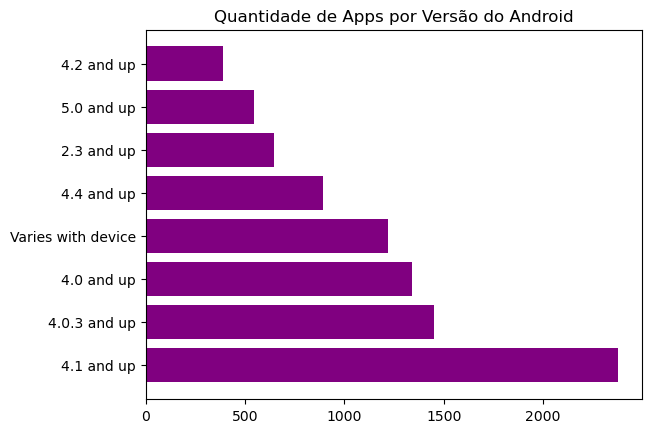

In [ ]:
# Quantidade de aplicativos por versão de android necessária
versao_android = dados['Android Ver'].value_counts()

# Selecionando apenas aqueles que possuem uma quantidade maior que a média
media = versao_android.mean()
versao_android = versao_android.loc[versao_android > media]

# Plotagem dos dados em um gráfico de barras horizontais
plt.title('Quantidade de Apps por Versão do Android')
plt.barh(versao_android.keys(), versao_android,color='purple')
plt.show()

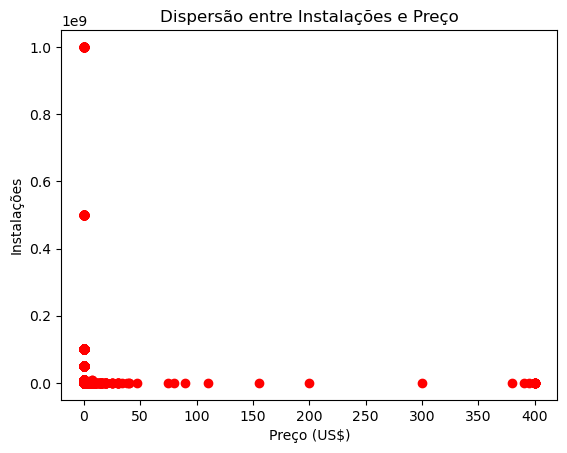

In [ ]:
# Dispersão entre Instalações e Preço buscando encontrar alguma relação entre os dois

# Seleciono as colunas Installs e Price
installs = dados['Installs']
prices = dados['Price']

# Limpeza dos dados sobre Installs e Price para melhor visualização
installs = installs.apply(lambda x: x.replace('+', ' ').strip())
installs = installs.apply(lambda x: x.replace(',', ''))
installs = installs.astype(int)

prices = prices.apply(lambda x: x.replace('$', ''))
prices = prices.astype(float)

# Plotagem dos dados em um gráfico de dispersão
plt.title('Dispersão entre Instalações e Preço')
plt.scatter(prices, installs, color='red')
plt.xlabel('Preço (US$)')
plt.ylabel('Instalações')
plt.show()
